In [202]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
X=wine['data']
y=wine['target']

In [3]:
X.shape, y.shape

((178, 13), (178,))

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine = datasets.load_wine()
print('Dataset structure= ', dir(wine))

df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()

Dataset structure=  ['DESCR', 'data', 'feature_names', 'target', 'target_names']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
df_corr=df.corr()

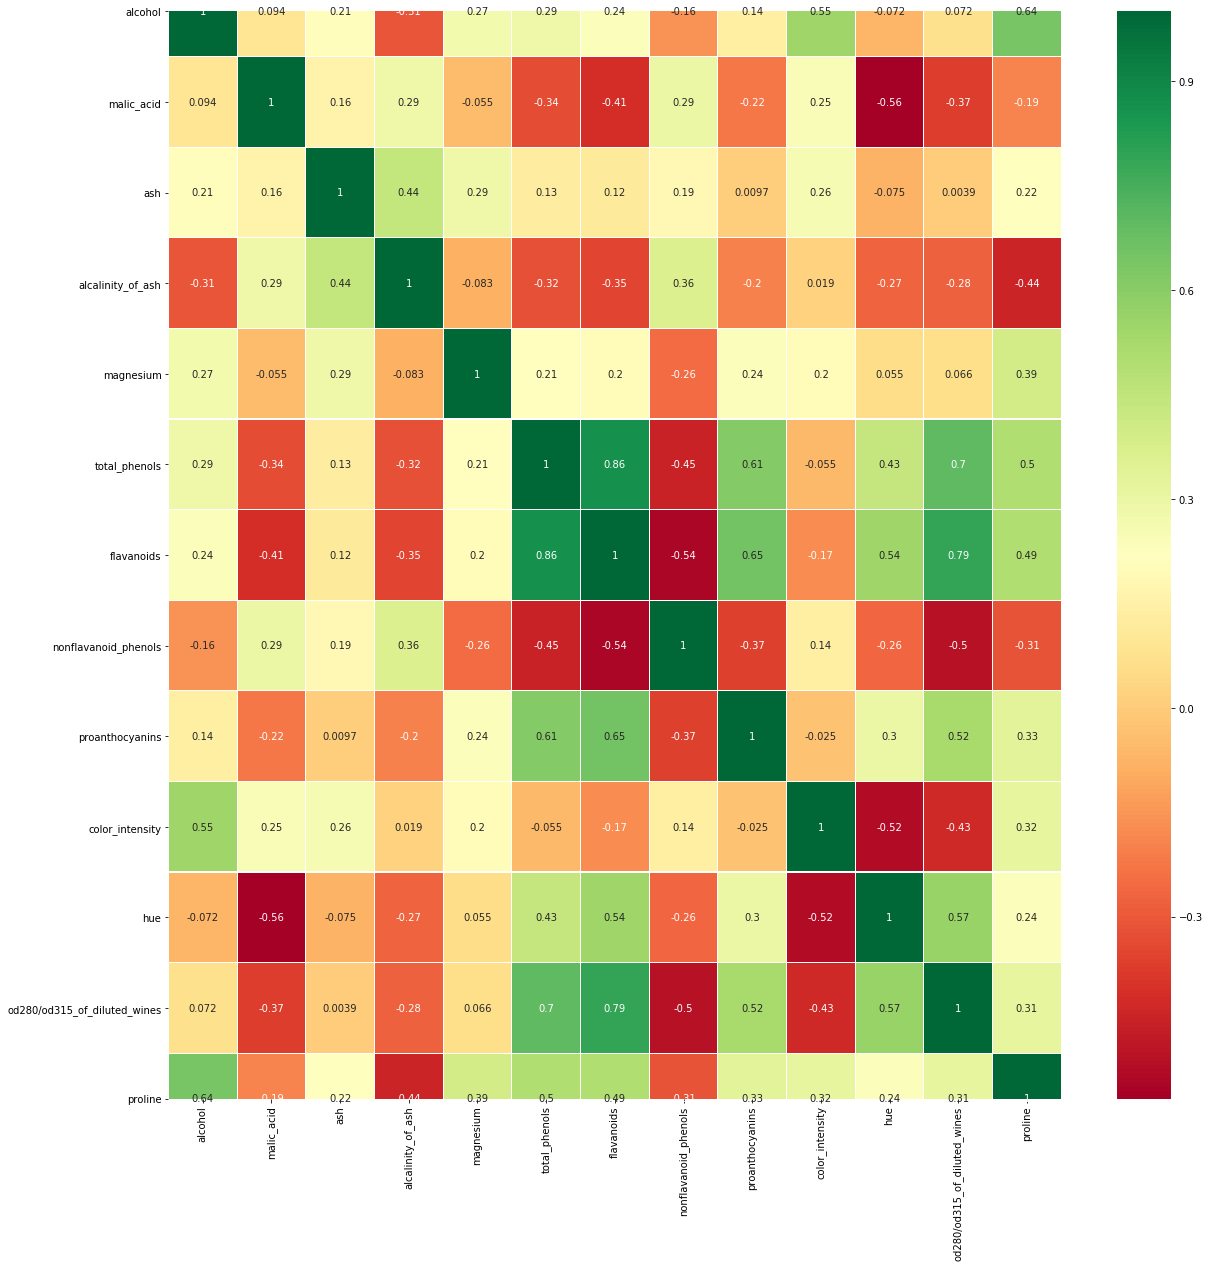

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True, cmap='RdYlGn', linewidth = 0.2)

#### 상관 관계가 큰 ('total_phenols','flavanoids'), ('flavanoids','od280/od315_of_diluted_wines')를 사용하여 clustering을 한다.

## ('total_phenols','flavanoids')

In [8]:
X1=[X[:,5],X[:,6]]

In [9]:
kmeans1 = KMeans(n_clusters = 3)
X1_KM = np.transpose(X1)
kmeans1.fit(X1_KM)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans1.inertia_

41.86847084826762

Text(0.5, 1.0, 'Inertia')

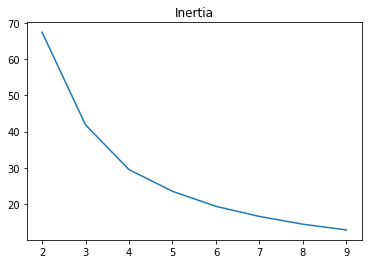

In [11]:
kiner = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1_KM)
    kiner[k] = kmeans.inertia_

plt.plot(list(kiner.keys()), list(kiner.values()))
plt.title("Inertia")

#### Inertia 결과 n_cluster로 3이 적당함을 확인 할 수 있다.

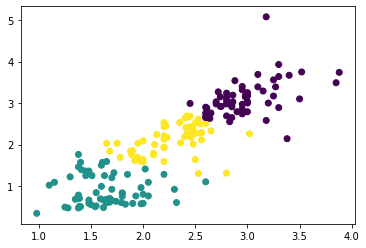

In [12]:
plt.scatter(X1[0],X1[1],c=kmeans1.labels_)

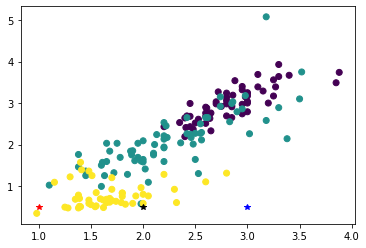

In [13]:
plt.scatter(X1[0],X1[1],c=y)
plt.plot([1],[0.5],'r*')
plt.plot([2],[0.5],'k*')
plt.plot([3],[0.5],'b*')

In [14]:
temp=[]
for (i,j) in zip(X1[0],X1[1]):
    r1=(i-1.5)**2 + (j-1)**2
    r2=(i-2)**2 + (j-2)**2
    r3=(i-3)**2 + (j-3)**2
    m=min(r1,r2,r3)
    temp.append([r1,r2,r3].index(m))

In [15]:
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X1[0],X1[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X1[0],X1[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X1[0],X1[1]) if(t==2)])
r1=np.mean(x1[0]),np.mean(x1[1])
r2=np.mean(x2[0]),np.mean(x2[1])
r3=np.mean(x3[0]),np.mean(x3[1])

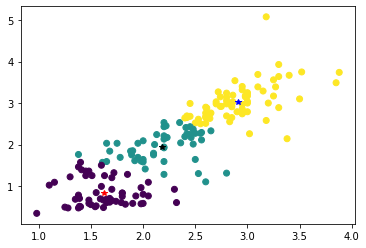

In [16]:
plt.scatter(X1[0],X1[1],c=temp)
plt.plot(r1[0],r1[1],'r*')
plt.plot(r2[0],r2[1],'k*')
plt.plot(r3[0],r3[1],'b*')

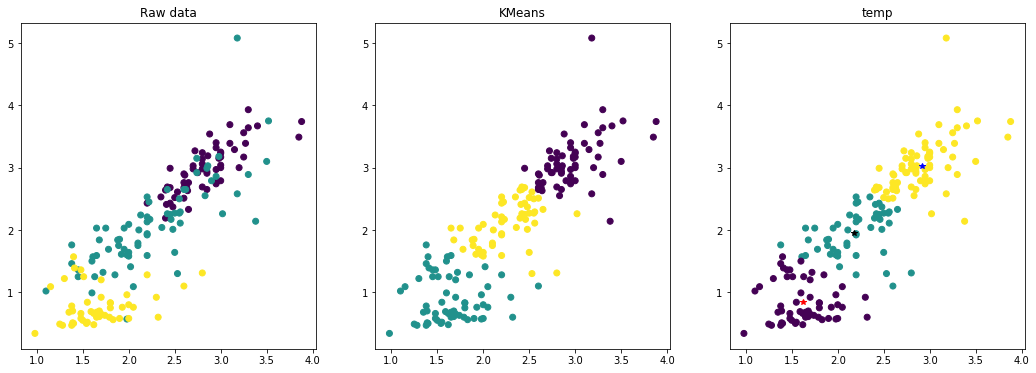

In [17]:
plt.figure(figsize = (18,6))
plt.subplot(131)
plt.title("Raw data")
plt.scatter(X1[0],X1[1],c=y)
plt.subplot(132)
plt.title("KMeans")
plt.scatter(X1[0],X1[1],c=kmeans1.labels_)
plt.subplot(133)
plt.title("temp")
plt.scatter(X1[0],X1[1],c=temp)
plt.plot(r1[0],r1[1],'r*')
plt.plot(r2[0],r2[1],'k*')
plt.plot(r3[0],r3[1],'b*')

## 'flavanoids','od280/od315_of_diluted_wines'

In [18]:
X2=[X[:,6],X[:,11]]

In [19]:
kmeans2 = KMeans(n_clusters = 3)
X2_KM = np.transpose(X2)
kmeans2.fit(X2_KM)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

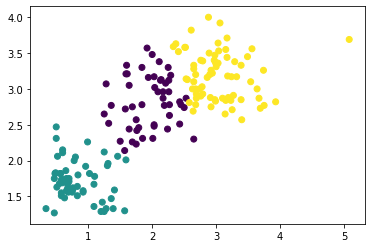

In [20]:
plt.scatter(X2[0],X2[1],c=kmeans2.labels_)

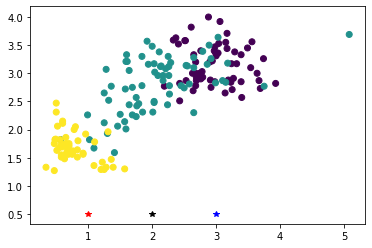

In [21]:
plt.scatter(X2[0],X2[1],c=y)
plt.plot([1],[0.5],'r*')
plt.plot([2],[0.5],'k*')
plt.plot([3],[0.5],'b*')

In [22]:
temp2=[]
for (i,j) in zip(X2[0],X2[1]):
    r4=(i-1.5)**2 + (j-1.3)**2
    r5=(i-2)**2 + (j-2.7)**2
    r6=(i-3)**2 + (j-3.2)**2
    m=min(r4,r5,r6)
    temp2.append([r4,r5,r6].index(m))

In [23]:
x4=np.transpose([[i,j] for (t,i,j) in zip(temp2,X2[0],X2[1]) if(t==0)])
x5=np.transpose([[i,j] for (t,i,j) in zip(temp2,X2[0],X2[1]) if(t==1)])
x6=np.transpose([[i,j] for (t,i,j) in zip(temp2,X2[0],X2[1]) if(t==2)])
r4=np.mean(x4[0]),np.mean(x4[1])
r5=np.mean(x5[0]),np.mean(x5[1])
r6=np.mean(x6[0]),np.mean(x6[1])

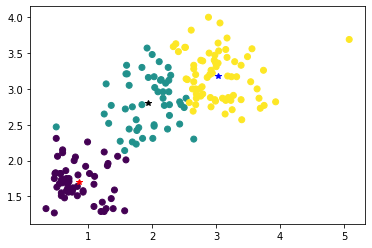

In [24]:
plt.scatter(X2[0],X2[1],c=temp2)
plt.plot(r4[0],r4[1],'r*')
plt.plot(r5[0],r5[1],'k*')
plt.plot(r6[0],r6[1],'b*')

Text(0.5, 1.0, 'temp')

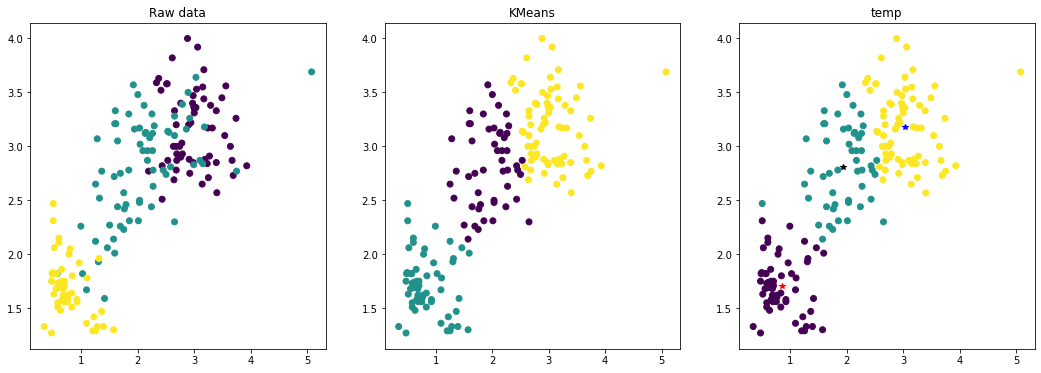

In [25]:
plt.figure(figsize = (18,6))
plt.subplot(131)
plt.title("Raw data")
plt.scatter(X2[0],X2[1],c=y)
plt.subplot(132)
plt.scatter(X2[0],X2[1],c=kmeans2.labels_)
plt.title("KMeans")
plt.subplot(133)
plt.scatter(X2[0],X2[1],c=temp2)
plt.plot(r4[0],r4[1],'r*')
plt.plot(r5[0],r5[1],'k*')
plt.plot(r6[0],r6[1],'b*')
plt.title("temp")

## 처음 데이터를 정할 때 heatmap을 활용하여 상관 관계를 확인했다. 확인후 상관관계가 높은 5번과 6번 데이터, 6번과 11번 데이터를 사용하여 그래프를 그렸다. Raw data와 KMeans, temp 그래프를 비교해서 보면 확실 잘 분류됨을 알 수 있다. KMean, temp를 비교하면 KMean을 사용한 그래프가 집단간의 간격이 더 넓어 보임을 알 수 있다.

### 정규화

In [41]:
scaler = MinMaxScaler()
nor_X= scaler.fit_transform(X)

### KMeans와 Normalization KMeans 비교

In [54]:
kmeans=KMeans(n_clusters=3)

In [55]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
result = kmeans.labels_

In [57]:
accuracy_score(result, y)

0.702247191011236

In [85]:
kmeans_nor=KMeans(n_clusters=3).fit(nor_X)

In [86]:
result_nor_KM = kmeans_nor.labels_

In [87]:
accuracy_score(result_nor_KM, y)

0.9550561797752809

#### KMean clustering보다 Normalization 한 뒤 KMean clustering 한 결과 값이 큰 차이를 보인다.

### PCA

In [124]:
pca = PCA(n_components = 2)
pca.fit(X)
pca_X = pca.fit_transform(X)

In [125]:
pca_nor_X=pca.fit_transform(nor_X)

In [164]:
kmeans_pca=KMeans(n_clusters=3).fit(pca_nor_X)

In [165]:
result_nor_pca = kmeans_pca.labels_

In [166]:
accuracy_score(result_nor_pca, y)

0.949438202247191

#### 13차원을 2차원으로 줄이는 pca 과정을 거치고 normalization, KMean clustering을 했을 때 얻은 정확도는 94.9%으로 pca없이 KMean + normalization한 값보다 약간 줄어 들었음을 확인 할 수 있다.

### GaussianMixture

In [198]:
GM = GaussianMixture(n_components=3).fit(nor_X)

In [199]:
result_nor_GM = GM.predict(nor_X)

In [200]:
accuracy_score(result_nor_GM, y)

0.9662921348314607

### SpectralClustering

In [203]:
SC_nor=SpectralClustering(n_clusters=3).fit(nor_X)

In [215]:
result_nor_SC = SC_nor.fit_predict(nor_X)

In [216]:
accuracy_score(result_nor_SC, y)

0.9775280898876404

#### 97.8%로 가장 높은 정확도를 보인다.

## 결론

### * 교수님께서 올려주신 clustering에 나와있는 method를 모두 활용하고 싶었으나 예제를 봐도 이해할 수 없는 method들이 있어서 KMean, GaussianMixture, SpectralClustering만 사용할 수 있었다. 그리고 6번째 강의 시간 때 배운 차원을 축소하는 PCA도 활용했다.
### * 먼저 정확도를 구하기 전에 정규화(Normalization)를 해서 정규화가 유의미한지 확인했다. 그 결과 70.2%와 95.5%로 유의함을 알 수 있었다. 그래서 이후 과정은 다 Normalization을 한 X값을 사용했다.
### * 각 method를 활용한 결과 Normalization(95.5%%), PCA(94.9%), GaussianMixture(96.6%), SpectralClustering(97.8%)가 나왔다. 즉, 우리가 Wine을 Clustering할 때 SpectralClustering을 활용하면 좀 더 정확한 값을 얻을 수 있다.